In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

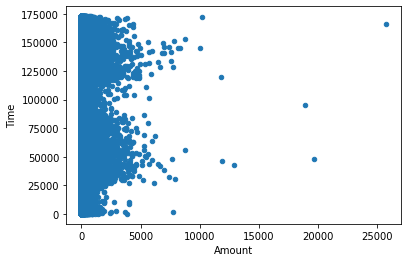

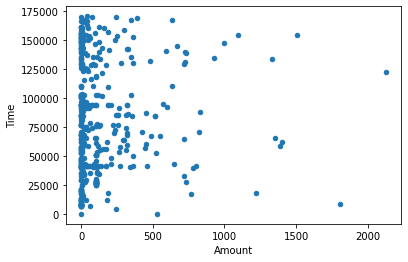

In [4]:
df[df.Class == 0].plot.scatter('Amount','Time')
df[df.Class == 1].plot.scatter('Amount','Time')

In [5]:
# We can see non-fraudelent sample mainly in range 0 - 5000. For sample Ammount > 5000 only have 55 samples.
# We can see it as outlier in non-fraudelent samples and it's no have significant for trainning dataset
df[df.Amount > 5000].shape

(55, 31)

In [6]:
# There are 55 record in dataset the Ammount is greater than 5000. 
# drop sample as outlier
df = df.drop(df[df.Amount > 5000].index, axis=0)
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [88]:
X = df.drop('Class', axis=1)
y = df.Class.values

In [89]:
counts = df.Class.value_counts()
print(counts)
print(f'Normal {(counts[0] / sum(counts))*100}% and Abnomaly {(counts[1] / sum(counts))*100}%')

0    284260
1       492
Name: Class, dtype: int64
Normal 99.82721807046131% and Abnomaly 0.1727819295386863%


#### Feature Importance

There are no sifnificant with time with class as expected. lets remove those columns

In [90]:
# Wee can see every time abnomaly can ocurr => drop Time column
X.drop("Time", axis=1, inplace=True)

#### Resampling stratergy

Dataset is highly imbalanced. Abnomoly transactions are only 0.17% from entire dataset. Direct oversampling or under sampling will not work for the dataset. Lest do mix of oversampling and under sampling to cover more data points from normal than taking just 492 records out of 284308 samples.


In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.05)
X_un, y_un = undersample.fit_resample(X, y)
smote = SMOTE(random_state=42)
X_up, y_up = smote.fit_resample(X_un, y_un)

In [16]:
from collections import Counter
Counter(y_up)

Counter({0: 9840, 1: 9840})

In [17]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
X_up["Amount"] = scaller.fit_transform(X_up["Amount"].values.reshape(-1, 1))

#### Defining Evaluation criteria

In [18]:
columns = ['Model','accuracy score', ' Precision','Recall','f1_score']
evaluation_df = pd.DataFrame(columns=columns)
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score


In [19]:
import sklearn.metrics as metrics

def print_results(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
#   save scores into dataframe for comparison
    evaluation_df.loc[len(evaluation_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix(y_test,y_pred,model_name)
    
    if pred_prob is not None:
        Plot_roc_curve(y_test,pred_prob,model_name,accuracy_score)

In [20]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['Normal','Anomaly']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [21]:
def Plot_roc_curve(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()
    

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
def create_model():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=[29]))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu',input_shape=[29]))
    model.add(Dropout(0.1))
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))

    model.compile( optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [80]:
classifier = create_model()
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                1920      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_36 (Dense)            (None, 8)                

In [81]:
early_stopping = EarlyStopping(patience = 10, min_delta = 0.001, restore_best_weights =True)

In [82]:
history  = classifier.fit(X_up,y_up,
               epochs=20,
               batch_size=32,
               validation_split=0.2,
               callbacks=[early_stopping],
               shuffle=True,
               verbose=1)

Epoch 1/20
492/492 [==============================] - 2s 3ms/step - loss: 0.1626 - accuracy: 0.9450 - val_loss: 0.1368 - val_accuracy: 0.9350
Epoch 2/20
492/492 [==============================] - 1s 3ms/step - loss: 0.0805 - accuracy: 0.9708 - val_loss: 0.1041 - val_accuracy: 0.9525
Epoch 3/20
492/492 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9759 - val_loss: 0.0901 - val_accuracy: 0.9543
Epoch 4/20
492/492 [==============================] - 1s 3ms/step - loss: 0.0522 - accuracy: 0.9801 - val_loss: 0.0523 - val_accuracy: 0.9746
Epoch 5/20
492/492 [==============================] - 2s 3ms/step - loss: 0.0454 - accuracy: 0.9824 - val_loss: 0.0641 - val_accuracy: 0.9741
Epoch 6/20
492/492 [==============================] - 1s 3ms/step - loss: 0.0407 - accuracy: 0.9846 - val_loss: 0.0368 - val_accuracy: 0.9850
Epoch 7/20
492/492 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.9874 - val_loss: 0.0233 - val_accuracy: 0.9936
Epoch 

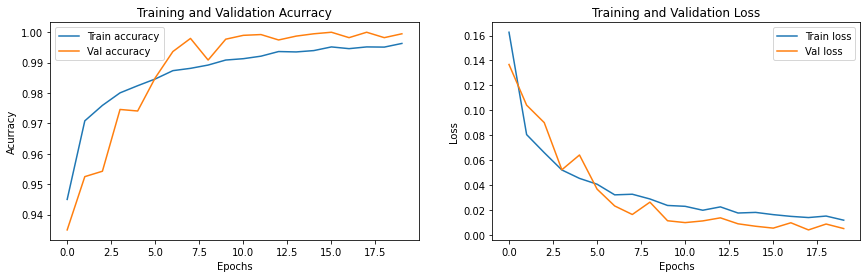

In [83]:
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history['accuracy'], label='Train accuracy')
axis[0].plot(history.history['val_accuracy'], label='Val accuracy')
axis[0].set_title('Training and Validation Acurracy')
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Acurracy')
axis[0].legend()
axis[1].plot(history.history['loss'], label='Train loss')
axis[1].plot(history.history['val_loss'], label='Val loss')
axis[1].set_title('Training and Validation Loss')
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Loss')
axis[1].legend()
plt.subplots_adjust(right=2)
plt.show()

In [113]:
X["Amount"] = scaller.fit_transform(X["Amount"].values.reshape(-1, 1))

In [125]:
y_predall = classifier.predict(X)

In [126]:
y_predall = np.where(y_predall < 0.65, 0, 1)

Neural network: 
--------------------------------------------------------------------------
accuracy score :0.995915744226555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284260
           1       0.30      0.99      0.46       492

    accuracy                           1.00    284752
   macro avg       0.65      0.99      0.73    284752
weighted avg       1.00      1.00      1.00    284752



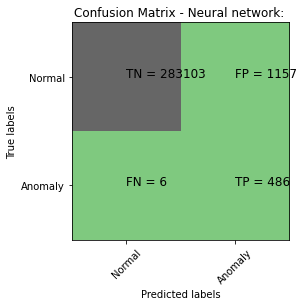

In [127]:
print_results("Neural network: ", y, y_predall)

In [ ]:
evaluation_df